# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

     |████████████████████████████████| 25.3 MB 73.0 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('/content/gdrive/MyDrive/99data/Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('/content/gdrive/MyDrive/99data/Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('/content/gdrive/MyDrive/99data/Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('/content/gdrive/MyDrive/99data/Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('/content/gdrive/MyDrive/99data/Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
print(df_hh_income.shape)
print(df_hh_income.columns)
print(df_hh_income.isna().values.any())
print(df_hh_income.duplicated().values.any())

(29322, 3)
Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
True
False


In [ ]:
print(df_pct_poverty.shape)
print(df_pct_poverty.columns)
print(df_pct_poverty.isna().values.any())
print(df_pct_poverty.duplicated().values.any())

(29329, 3)
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
False
False


In [ ]:
print(df_pct_completed_hs.shape)
print(df_pct_completed_hs.columns)
print(df_pct_completed_hs.isna().values.any())
print(df_pct_completed_hs.duplicated().values.any())

(29329, 3)
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
False
False


In [ ]:
print(df_share_race_city.shape)
print(df_share_race_city.columns)
print(df_share_race_city.isna().values.any())
print(df_share_race_city.duplicated().values.any())

(29268, 7)
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
False
False


In [ ]:
print(df_fatalities.shape)
print(df_fatalities.columns)
print(df_fatalities.isna().values.any())
print(df_fatalities.duplicated().values.any())

(2535, 14)
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')
True
False


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [ ]:
df_hh_income.fillna(0, inplace=True)
df_hh_income.isna().values.any()

False

In [ ]:
df_fatalities.fillna(0, inplace=True)
df_fatalities.isna().values.any()

False

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [ ]:
df_pct_poverty.poverty_rate = df_pct_poverty.poverty_rate.astype('string')
df_pct_poverty.poverty_rate = df_pct_poverty.poverty_rate.str.replace('-', '0')
df_pct_poverty.poverty_rate = df_pct_poverty.poverty_rate.astype('float64')
df_pct_poverty_bar = df_pct_poverty
# print(df_pct_poverty_bar)

df_pct_poverty_bar.drop(columns=['City'], inplace=True)
df_pct_poverty_bar = df_pct_poverty_bar.groupby('Geographic Area').mean()
df_pct_poverty_bar = df_pct_poverty_bar.sort_values('poverty_rate', ascending=False)
# df_pct_poverty_bar['Geographic Area']
# df_pct_poverty_bar.values

poverty_bar = px.bar(x=df_pct_poverty_bar.index,
                  y=df_pct_poverty_bar.poverty_rate,
#                   # orientation='h',
                  color=df_pct_poverty_bar.poverty_rate,
                  color_continuous_scale=px.colors.sequential.Plasma,
                  title='Poverty Rate in each US State')
poverty_bar.update_layout(xaxis_title='States', 
                       yaxis_title='Poverty rate',
                       coloraxis_showscale=False)
poverty_bar.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [ ]:
# df_pct_completed_hs_bar
df_pct_completed_hs.percent_completed_hs = df_pct_completed_hs.percent_completed_hs.astype('string')
df_pct_completed_hs.percent_completed_hs = df_pct_completed_hs.percent_completed_hs.str.replace('-', '0')
df_pct_completed_hs.percent_completed_hs = df_pct_completed_hs.percent_completed_hs.astype('float64')
df_pct_completed_hs_bar = df_pct_completed_hs
# df_pct_completed_hs_bar.drop(columns=['City'], inplace=True)
# df_pct_completed_hs_bar

In [ ]:
df_pct_completed_hs_bar = df_pct_completed_hs_bar.groupby('Geographic Area').mean()
df_pct_completed_hs_bar = df_pct_completed_hs_bar.sort_values('percent_completed_hs', ascending=True)
# df_pct_completed_hs_bar

In [ ]:
completed_hs = px.bar(x=df_pct_completed_hs_bar.index,
                  y=df_pct_completed_hs_bar.percent_completed_hs,
#                   # orientation='h',
                  color=df_pct_completed_hs_bar.percent_completed_hs,
                  color_continuous_scale=px.colors.sequential.Bluered,
                  title='High School Graduation Rate by US State')
completed_hs.update_layout(xaxis_title='States', 
                       yaxis_title='Graduation Rate',
                       coloraxis_showscale=False)
completed_hs.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [ ]:
merged_df = pd.merge(df_pct_completed_hs_bar, df_pct_poverty_bar, on='Geographic Area')
merged_df

,percent_completed_hs,poverty_rate
Geographic Area,,
TX,74.09,19.50
MS,78.47,26.88
GA,78.63,23.66
NM,78.97,22.51
LA,79.12,22.29
AZ,79.22,25.27
AR,79.95,22.96
AK,80.10,18.68
AL,80.16,20.61


In [ ]:
m = merged_df.columns
list(m)

['percent_completed_hs', 'poverty_rate']

No handles with labels found to put in legend.


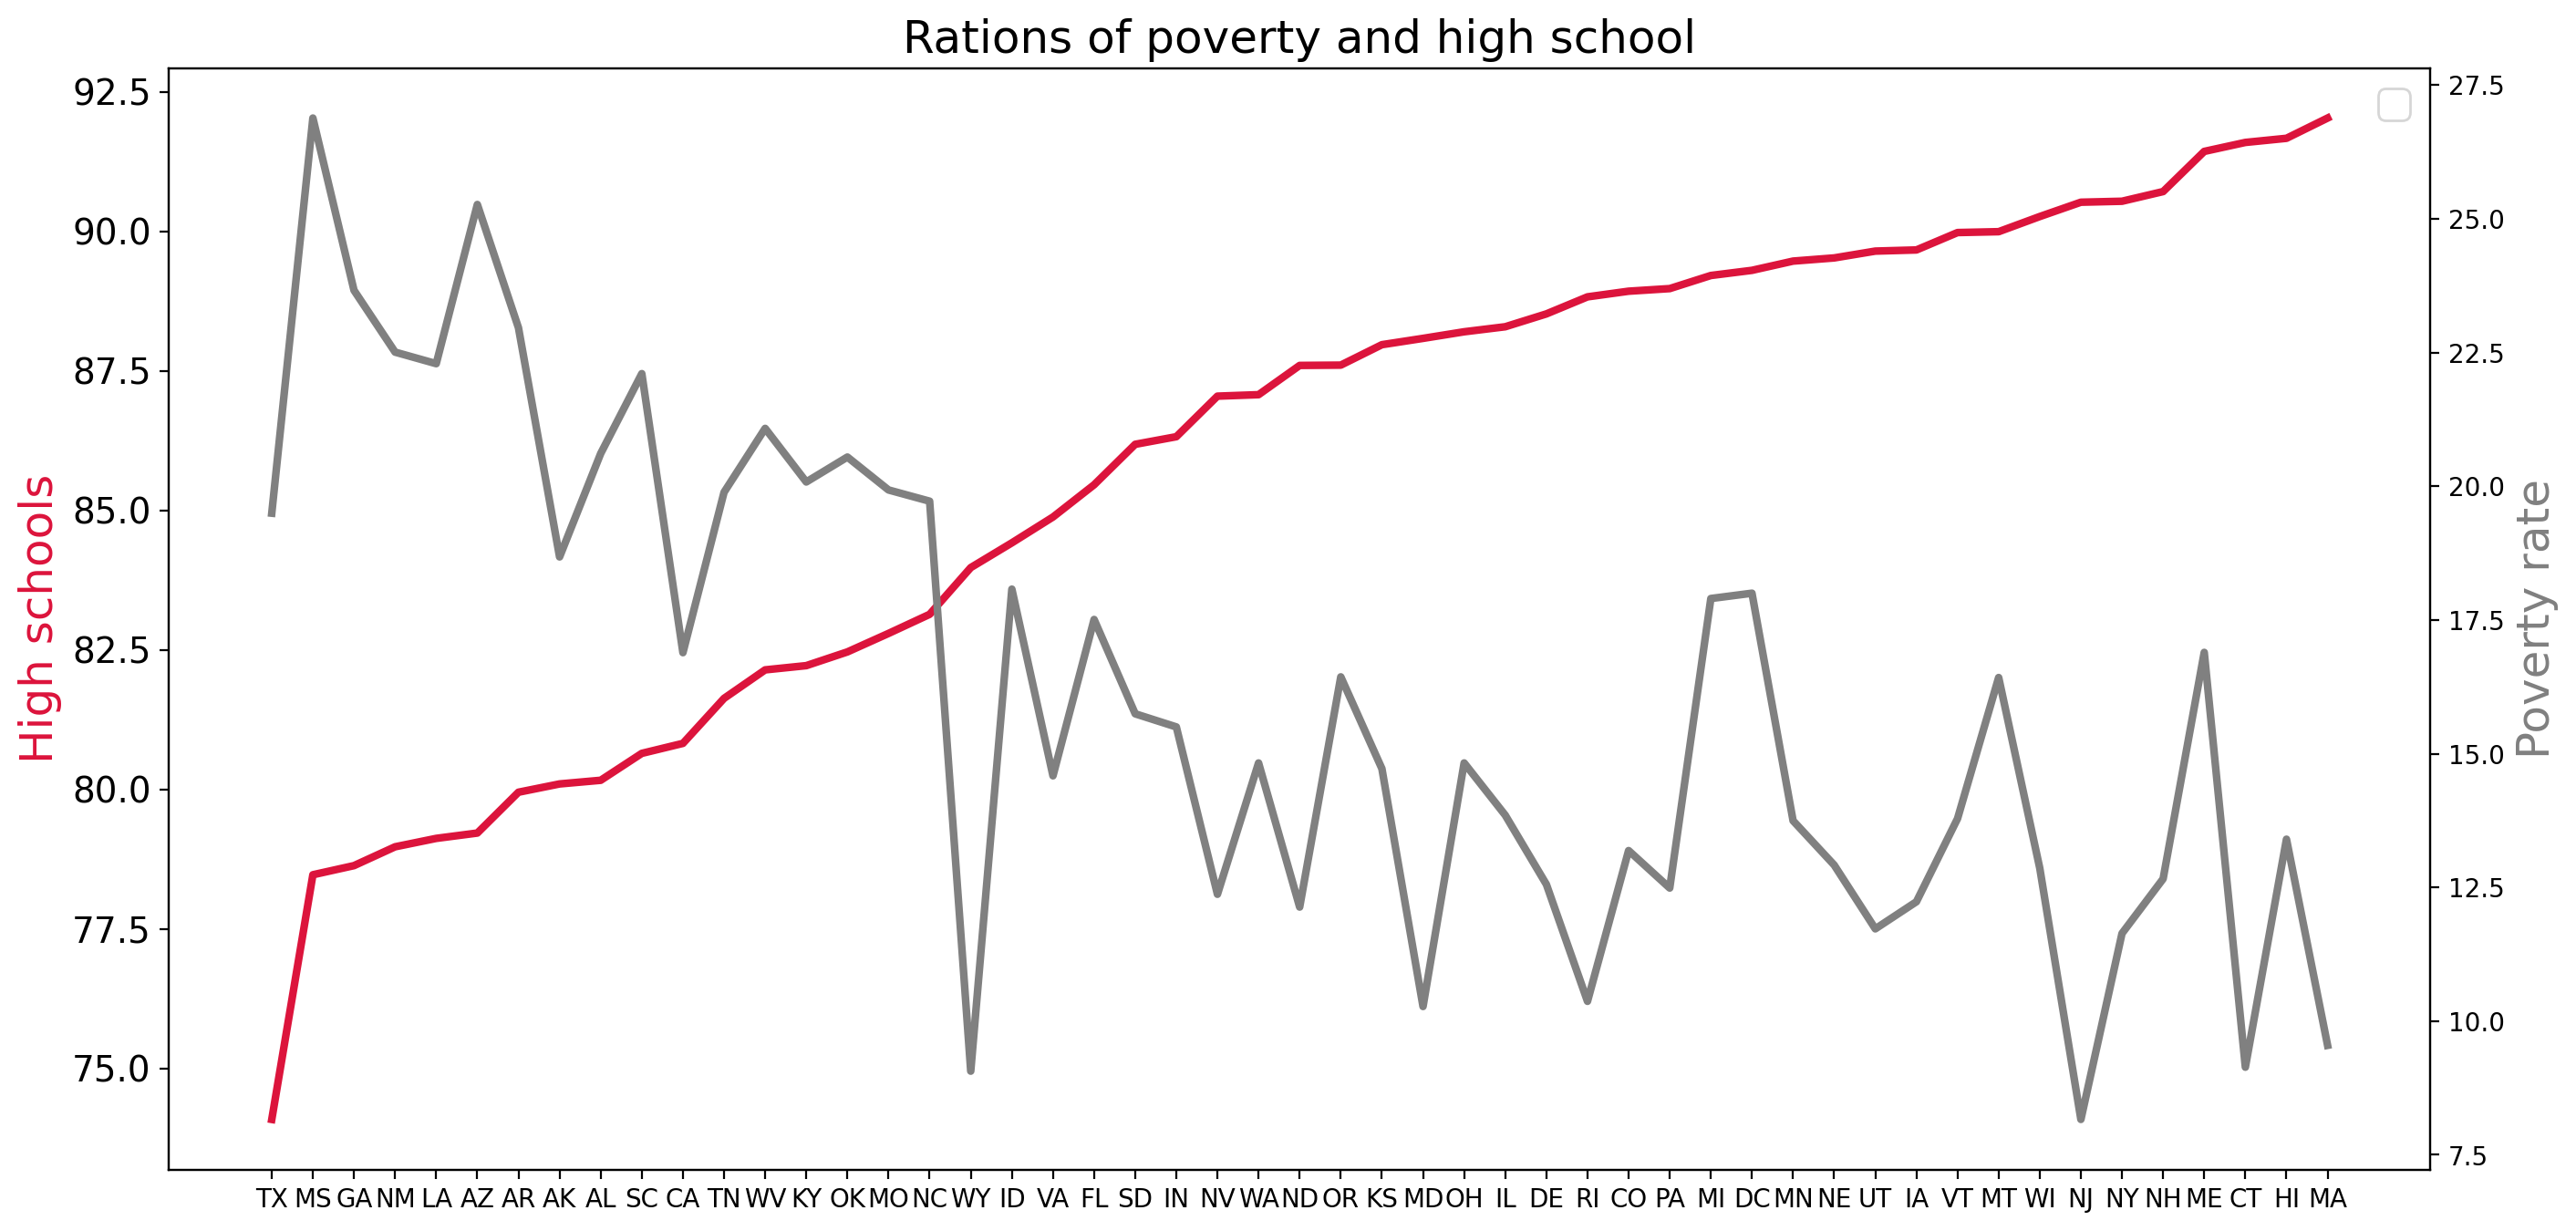

In [ ]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Rations of poverty and high school', fontsize=18)
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax2 = ax1.twinx()
# ax1.set_xlim(1900, 2020)

# Can invert axis
# ax2.invert_yaxis()
ax1.set_ylabel('High schools', color='crimson', fontsize=18)
ax2.set_ylabel('Poverty rate', color='grey', fontsize=18)


ax1.plot(merged_df.index, 
        merged_df.percent_completed_hs, 
        c='crimson', 
        linewidth=3,)

ax2.plot(merged_df.index, 
        merged_df.poverty_rate, 
        c='grey', 
        linewidth=3,)
plt.legend(fontsize=16)
# plt.legend(['ax', 'ax2'])

plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

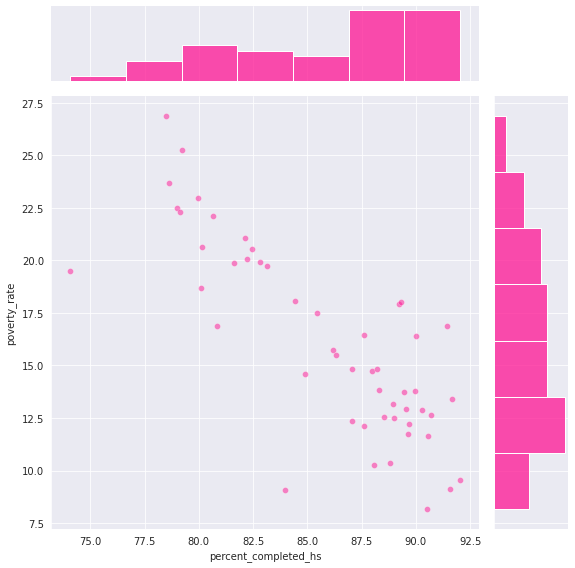

In [ ]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=merged_df.percent_completed_hs, 
                y=merged_df.poverty_rate, 
                height=8, 
                kind='scatter',
                color='deeppink', 
                joint_kws={'alpha':0.5})

plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



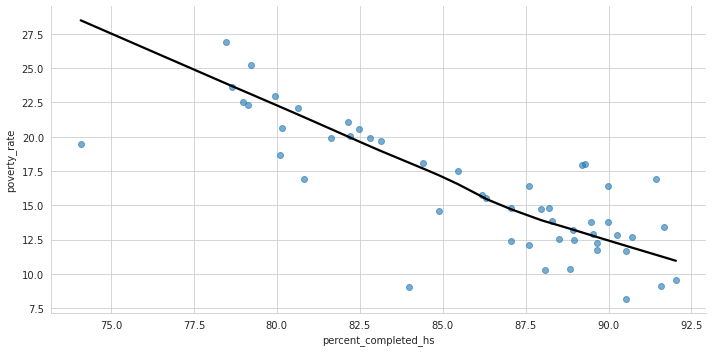

In [ ]:
with sns.axes_style('whitegrid'):
    sns.lmplot(data=merged_df,
               x='percent_completed_hs', 
               y='poverty_rate',
              #  hue= 'Geographic Area',
               lowess=True, 
               aspect=2,
               scatter_kws = {'alpha': 0.6},
               line_kws = {'color': 'black'},)

plt.show()

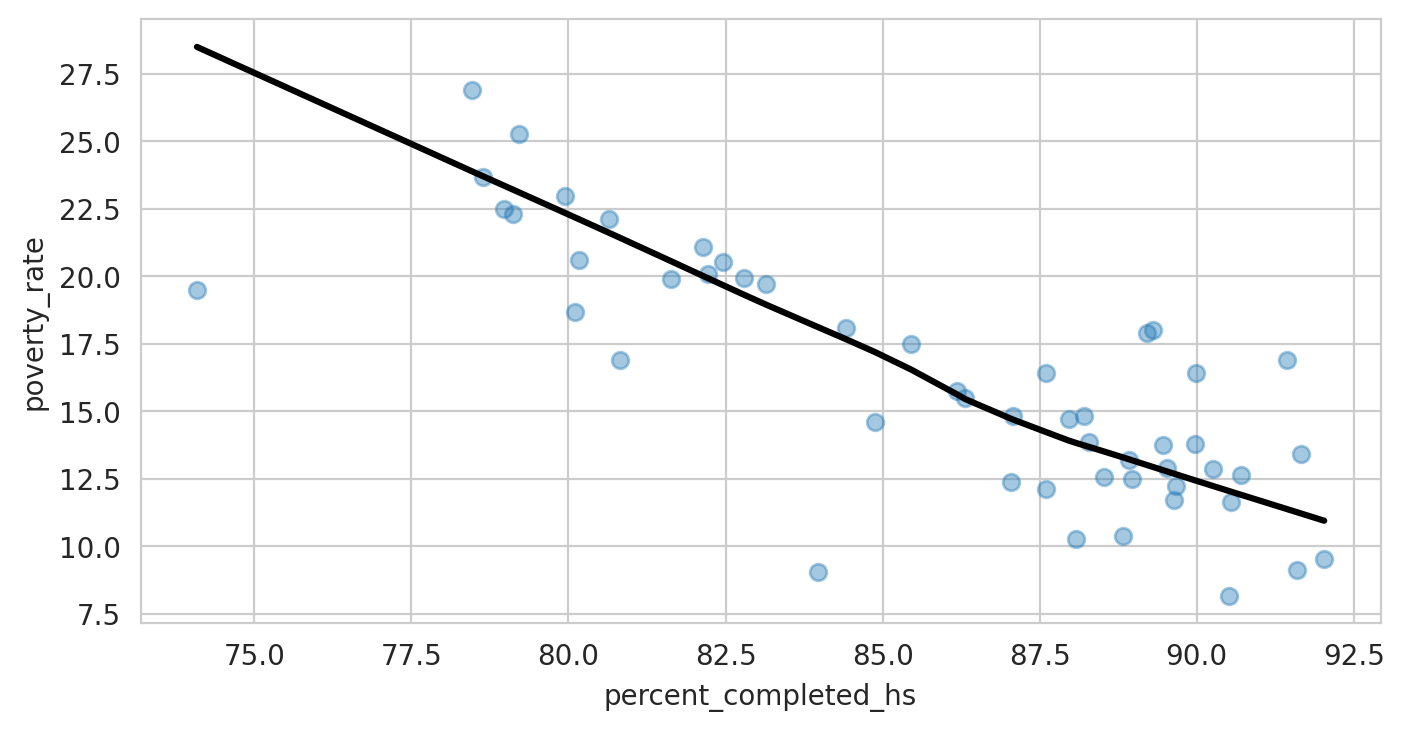

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(data=merged_df,
                x='percent_completed_hs', 
                y='poverty_rate',
                lowess=True, 
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})

plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [ ]:
# df_share_race_city.share_white.median()
df_share_race_city.drop(df_share_race_city.index[df_share_race_city.share_white == '(X)'], inplace=True)
df_share_race_city.share_white = df_share_race_city.share_white.astype('float64')
df_share_race_city.share_black = df_share_race_city.share_black.astype('float64')
df_share_race_city.share_native_american = df_share_race_city.share_native_american.astype('float64')
df_share_race_city.share_asian = df_share_race_city.share_asian.astype('float64')
df_share_race_city.share_hispanic = df_share_race_city.share_hispanic.astype('float64')
df_share_race_city_bar = df_share_race_city.groupby('Geographic area').mean()
df_share_race_city_bar.reset_index(inplace=True)
df_share_race_city_bar.head(5)

,Geographic area,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AK,45.65,0.57,45.86,1.39,2.15
1,AL,72.51,23.32,0.66,0.48,2.98
2,AR,78.45,16.30,0.76,0.48,4.27
3,AZ,59.93,0.95,28.59,0.73,20.14
4,CA,71.87,2.69,1.72,5.57,29.65


In [ ]:
df = pd.melt(df_share_race_city_bar, id_vars='Geographic area', var_name='Race', value_name='Value')
df

,Geographic area,Race,Value
0,AK,share_white,45.65
1,AL,share_white,72.51
2,AR,share_white,78.45
3,AZ,share_white,59.93
4,CA,share_white,71.87
...,...,...,...
250,VT,share_hispanic,1.38
251,WA,share_hispanic,10.61
252,WI,share_hispanic,3.32
253,WV,share_hispanic,0.90


In [ ]:
v_bar_split = px.bar(x=df['Geographic area'], y=df.Value, color=df.Race, orientation='v')

v_bar_split.update_layout(xaxis_title='States', 
                          yaxis_title='Racial Malkeup')
v_bar_split.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [ ]:
df_fatalities_count = df_fatalities.race.value_counts()
fig = px.pie(labels=df_fatalities_count.index, 
             values=df_fatalities_count.values,
             title="People Killed by Race",
             names=df_fatalities_count.index,
             hole=0.4,)

fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [ ]:
df_fatalities_gender = df_fatalities.groupby('gender').count()
# df_fatalities_gender.head(5)
v_bar = px.bar(x=df_fatalities_gender.index, y=df_fatalities_gender.id, color=df_fatalities_gender.id)
v_bar.update_layout(xaxis_title='Gender', yaxis_title='Amount')
v_bar.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [ ]:
# df_fatalities_age = df_fatalities.groupby('age').count() 
# df_fatalities_age.reset_index()
# df_fatalities_age.head(5)
# df_fatalities_gender2 = df_fatalities.groupby(by=['gender', 'age']).count()
# df_fatalities_gender2.head(50)
# df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,nan,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


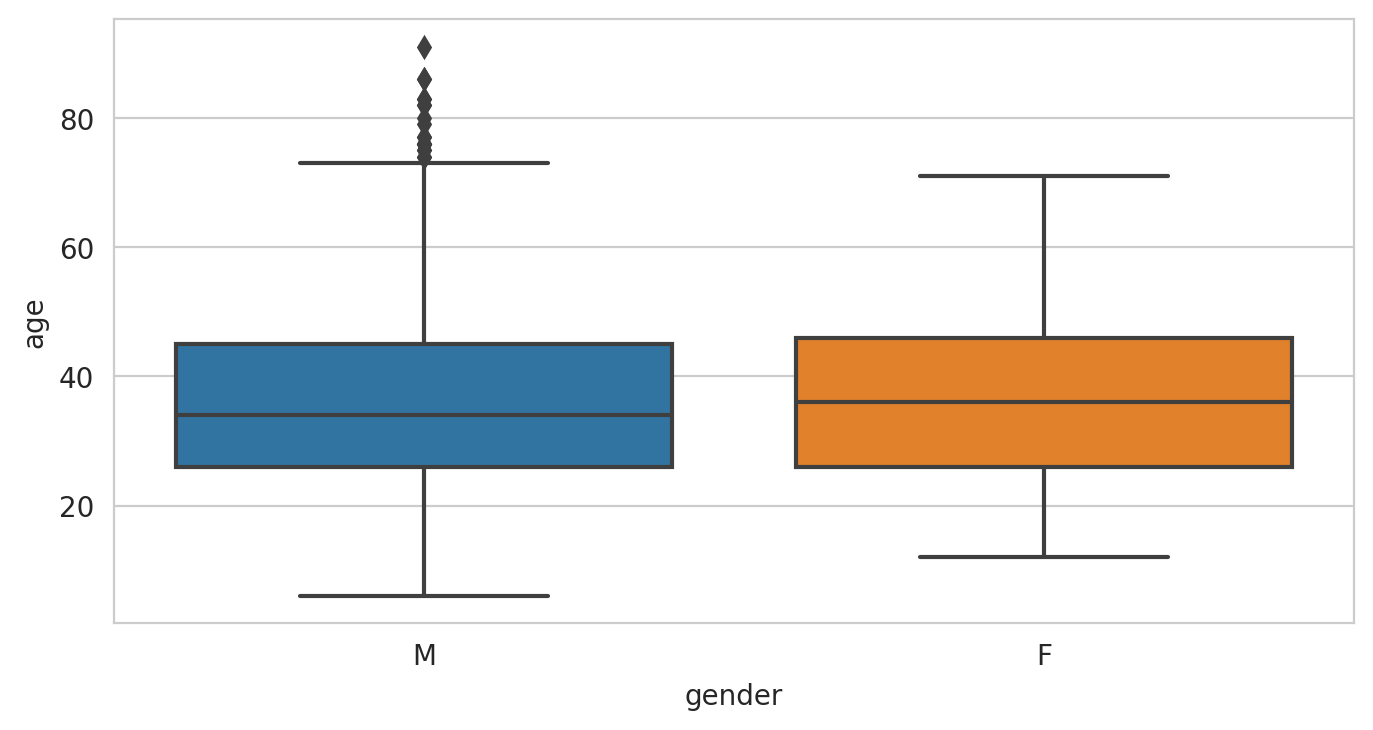

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  box = sns.boxplot(data=df_fatalities, 
             x='gender', 
             y='age')#,
            #  color='gender',
            #  title='Age of Death')
# box.update_layout(xaxis_title='Washing Hands?',
#                   yaxis_title='Percentage of Monthly Deaths',)
plt.show()

In [ ]:
# df_fatalities_gender2 = df_fatalities.groupby(by=['gender', 'manner_of_death']).count()
# df_fatalities_gender2.head(5)

id  name  date  ...  threat_level  flee  body_camera
gender manner_of_death                     ...                                 
F      shot               102   102   102  ...           102    99          102
       shot and Tasered     5     5     5  ...             5     5            5
M      shot              2261  2261  2261  ...          2261  2204         2261
       shot and Tasered   167   167   167  ...           167   162          167

[4 rows x 12 columns]

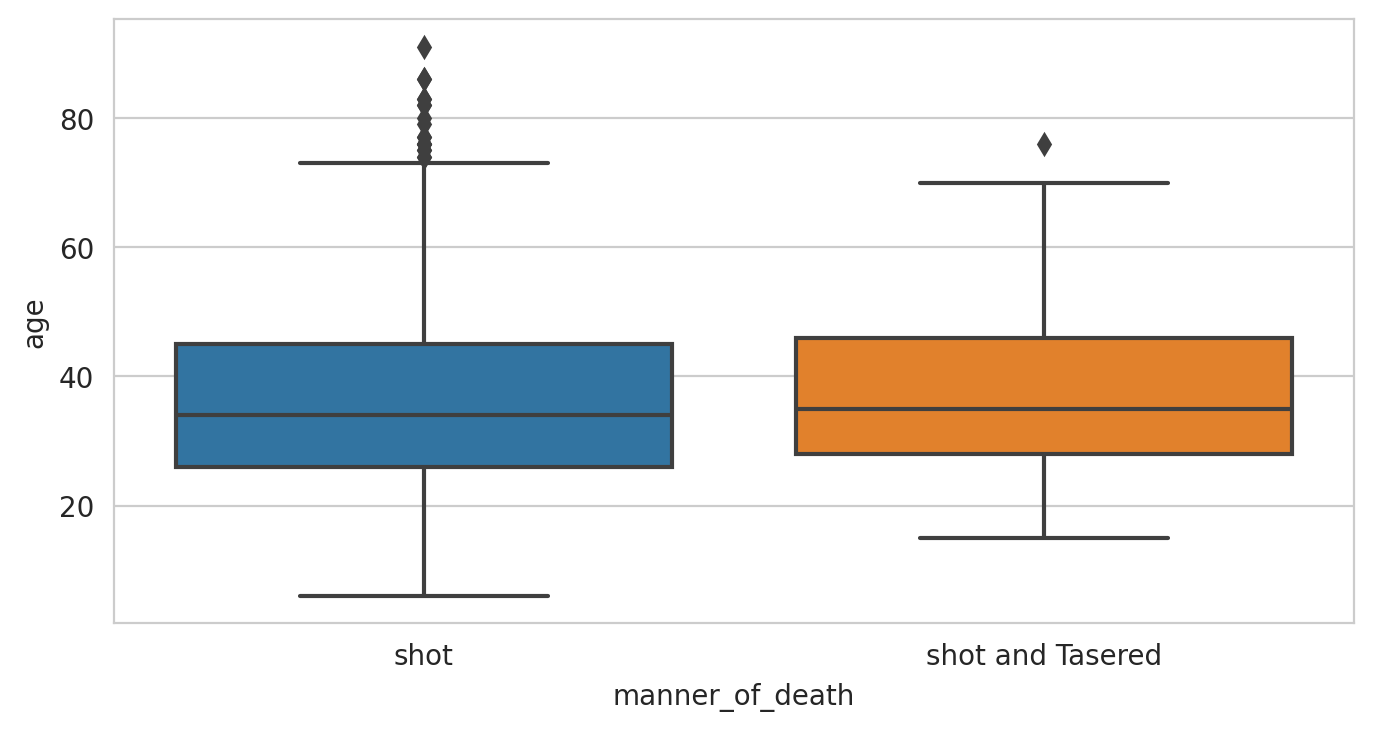

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  box = sns.boxplot(data=df_fatalities, 
             x='manner_of_death', 
             y='age')#,
plt.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [ ]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,nan,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


In [ ]:
df_fatalities_armed = df_fatalities.armed.value_counts()
fig = px.pie(labels=df_fatalities_armed.index, 
             values=df_fatalities_armed.values,
             title="People Armed",
             names=df_fatalities_armed.index,
             )

fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

fig.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [16]:
# df_fatalities.age[df_fatalities.age <= 25].count()
details = {
    'Age' : ['Younger 25', 'Older 25'],
    'Amount' : [df_fatalities.age[df_fatalities.age <= 25].count(), df_fatalities.age[df_fatalities.age > 25].count()],
}
df25 = pd.DataFrame(details)
fig = px.pie(labels=df25.Age, 
             values=df25.Amount,
             title="Percentage of people killed were under 25 years old",
             names=df25.Age,
             )
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
fig.show()

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

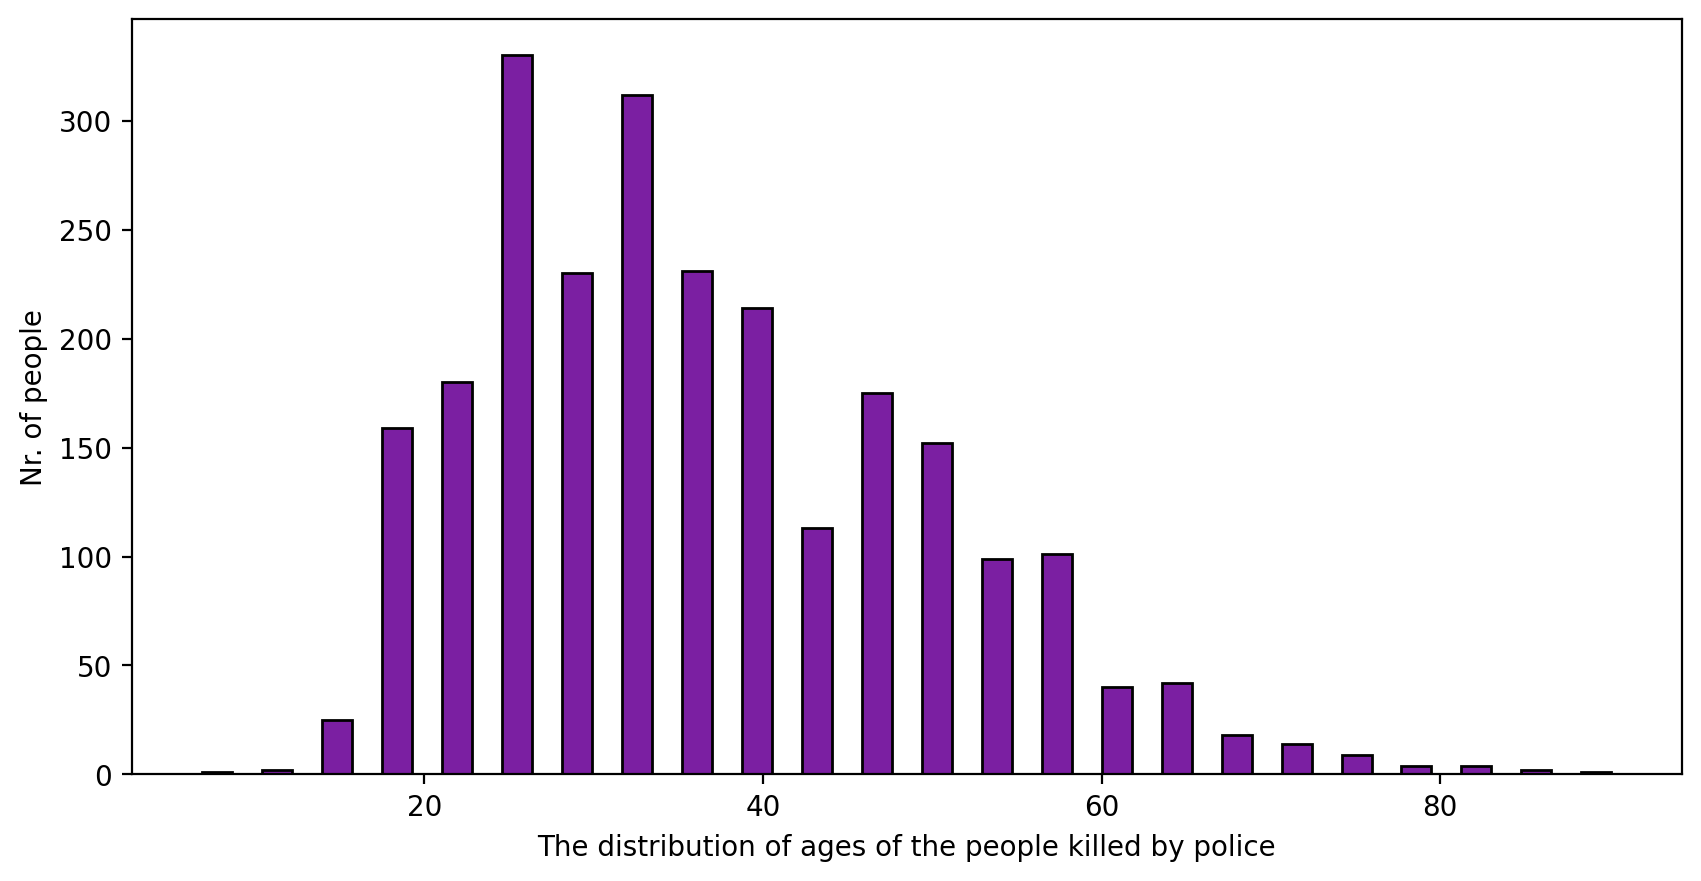

In [19]:
plt.figure(figsize=(10, 5), dpi=200)
plt.hist(df_fatalities.age, 
         bins=24, 
         ec='black', 
         color='#7b1fa2', 
         rwidth=0.5)
plt.xlabel('The distribution of ages of the people killed by police')
plt.ylabel('Amount of people')
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

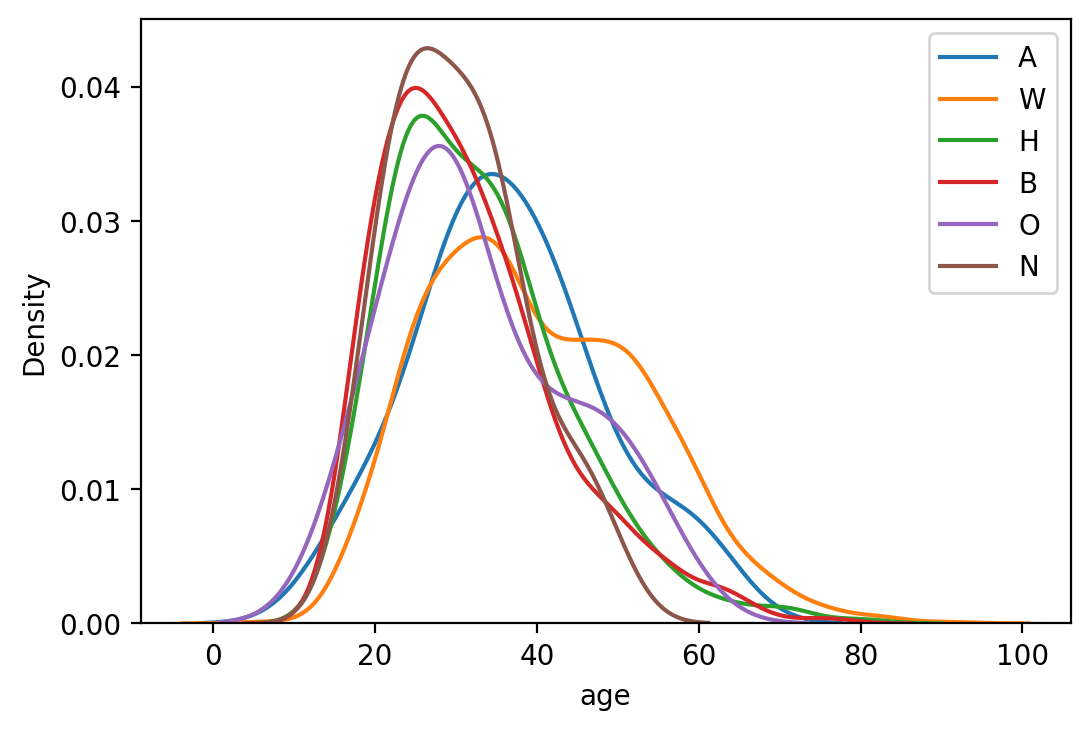

In [26]:
plt.figure(dpi=200)
for i in df_fatalities.race.unique():
  sns.kdeplot(df_fatalities.age[df_fatalities.race == i], label=i)
sns
plt.legend()
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [31]:
df_fatalities_race = df_fatalities.groupby('race').count()
vr_bar = px.bar(x=df_fatalities_race.index, y=df_fatalities_race.id, color=df_fatalities_race.id)
vr_bar.update_layout(xaxis_title='Race', yaxis_title='Amount')
vr_bar.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [33]:
df_fatalities_signs = df_fatalities.signs_of_mental_illness.value_counts()
fig = px.pie(labels=df_fatalities_signs.index, 
             values=df_fatalities_signs.values,
             title="The percentage of people killed by police have been diagnosed with a mental illness",
             names=df_fatalities_signs.index,
             )
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

fig.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [37]:
df_fatalities_cities = df_fatalities.groupby('city').count().sort_values('id', ascending=False)[:9]
vc_bar = px.bar(x=df_fatalities_cities.index, y=df_fatalities_cities.id, color=df_fatalities_cities.id)
vc_bar.update_layout(xaxis_title='City', yaxis_title='Amount')
vc_bar.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).